In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *
from common import load_classes
#path = Path(Config.get_key('data_path')).expanduser()/'handwritten'
path = Path('.')
#bs = 4096
#tfms = get_transforms(do_flip=False)
#data = ImageDataBunch.from_folder(path, train='Train', valid='Validation', ds_tfms=tfms, size=32, bs=bs)
#learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [3]:
model_name = 'stage-1-resnet50-224px-spanish'
classes = load_classes(model_name)
SIZE = 224

In [4]:
#empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms()).normalize(imagenet_stats)
empty_data = ImageDataBunch.single_from_classes(path, classes, tfms=get_transforms())
learn = create_cnn(empty_data, models.resnet50)
# The model was created as DataParallel, therefore we need to load it as DataParallel for inference.
#learn.model = torch.nn.DataParallel(learn.model)

In [5]:
#learn.path = Path('.')
learn.load(model_name)

Learner(data=ImageDataBunch;
Train: LabelList
y: CategoryList (1 items)
[]...
Path: .
x: ImageItemList (1 items)
[]...
Path: .;
Valid: LabelList
y: CategoryList (1 items)
[]...
Path: .
x: ImageItemList (1 items)
[]...
Path: .;
Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, k

In [6]:
#! wget http://yourstorage.blob.core.windows.net/ficheros/e.png

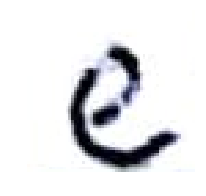

In [7]:
img = open_image("test/e.png")
img.show()

In [8]:
learn.predict(img)

('G',
 tensor(2),
 tensor([1.8738e-06, 3.8571e-04, 9.9863e-01, 1.8795e-06, 1.7425e-07, 2.9011e-11,
         2.7024e-09, 3.7114e-13, 1.6613e-07, 2.4345e-08, 6.5714e-04, 4.6718e-06,
         3.8429e-11, 5.6800e-09, 4.2548e-09, 2.4323e-08, 7.4579e-07, 2.9095e-04,
         2.9153e-06, 2.6608e-05]))

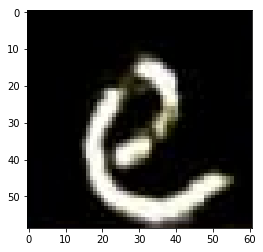

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test/e.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [10]:
cv2.imwrite('einvert.png',img)

True

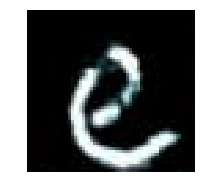

In [11]:
img = open_image("einvert.png")
img.show()

In [12]:
learn.predict(img)

('G',
 tensor(2),
 tensor([4.1980e-08, 5.9322e-12, 9.9997e-01, 4.6239e-13, 2.8813e-12, 2.3832e-09,
         1.1548e-15, 4.5041e-18, 9.0452e-11, 6.2461e-12, 6.6484e-06, 2.1757e-05,
         2.7331e-11, 2.4913e-12, 5.9008e-13, 1.1402e-12, 4.3844e-09, 1.1274e-07,
         5.7052e-09, 4.5549e-06]))

In [13]:
img.shape

torch.Size([3, 59, 61])

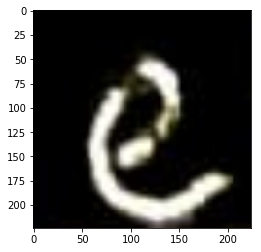

In [14]:
img = cv2.imread('einvert.png')
img = cv2.resize(img, (SIZE,SIZE))
plt.imshow(img)

In [15]:
cv2.imwrite('einvert32x32.png',img)

True

In [16]:
img = open_image("einvert32x32.png")
learn.predict(img)

('G',
 tensor(2),
 tensor([1.6038e-04, 1.2110e-04, 9.8416e-01, 4.9611e-05, 6.2390e-03, 5.8960e-04,
         5.4945e-07, 1.6972e-04, 2.5180e-06, 1.4205e-04, 4.4648e-05, 1.1304e-04,
         4.6014e-06, 4.7825e-03, 1.9271e-05, 2.0138e-05, 2.7763e-04, 3.5280e-05,
         3.0534e-03, 1.0822e-05]))

In [17]:
#! rm 4.png*
#! wget http://yourstorage.blob.core.windows.net/ficheros/4.png

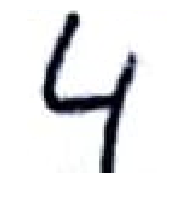

In [18]:
img = open_image("test/4.png")
img.show()

In [19]:
learn.predict(img)

('G',
 tensor(2),
 tensor([1.5561e-05, 6.2601e-04, 9.9926e-01, 5.1690e-08, 5.8915e-09, 1.8629e-13,
         2.5609e-09, 5.4692e-15, 6.0701e-08, 1.3176e-10, 9.7460e-05, 1.1639e-08,
         5.6888e-12, 6.9547e-10, 1.4523e-08, 1.9414e-09, 8.9372e-09, 3.0507e-07,
         9.6059e-07, 4.5034e-06]))

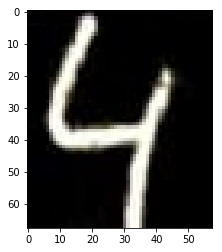

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('test/4.png')
img = cv2.bitwise_not(img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.imshow(img)

In [21]:
cv2.imwrite('4invert.png',img)

True

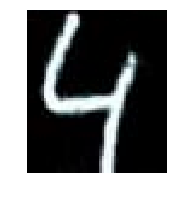

In [22]:
img = open_image("4invert.png")
img.show()

In [23]:
learn.predict(img)

('G',
 tensor(2),
 tensor([3.1925e-09, 1.0261e-07, 1.0000e+00, 2.2952e-10, 5.3707e-13, 2.1062e-14,
         2.1348e-13, 5.7646e-18, 4.4592e-10, 3.4248e-13, 1.0227e-07, 3.8906e-08,
         2.3769e-14, 1.1890e-10, 5.3515e-13, 4.6152e-14, 1.1290e-11, 1.1627e-09,
         3.3740e-08, 3.5466e-07]))

In [24]:
img.shape

torch.Size([3, 68, 58])

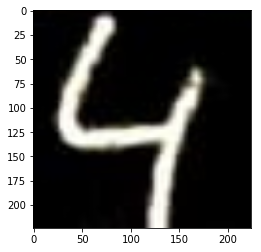

In [25]:
img = cv2.imread('4invert.png')
img = cv2.resize(img, (SIZE,SIZE))
plt.imshow(img)

In [26]:
cv2.imwrite('4invert32x32.png',img)

True

In [27]:
img = open_image("4invert32x32.png")
learn.predict(img)

('G',
 tensor(2),
 tensor([1.0472e-04, 5.6990e-03, 6.3976e-01, 1.0199e-03, 5.9863e-05, 3.3580e-03,
         2.0724e-05, 1.2464e-04, 4.1753e-05, 3.0697e-03, 3.7230e-04, 1.2292e-02,
         1.0046e-04, 2.9546e-03, 3.7801e-06, 3.8945e-05, 7.5323e-04, 2.6841e-04,
         3.7386e-02, 2.9257e-01]))

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict(image_path):
    img = cv2.imread(image_path)
    img = cv2.bitwise_not(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    cv2.imwrite('invert.png',img)
    img = open_image("invert.png")
    img.show()
    img = cv2.imread('invert.png')
    img = cv2.resize(img, (SIZE,SIZE))
    plt.imshow(img)
    cv2.imwrite('predict.png',img)
    img = open_image("predict.png")
    return learn.predict(img)

('G',
 tensor(2),
 tensor([1.0472e-04, 5.6990e-03, 6.3976e-01, 1.0199e-03, 5.9863e-05, 3.3580e-03,
         2.0724e-05, 1.2464e-04, 4.1753e-05, 3.0697e-03, 3.7230e-04, 1.2292e-02,
         1.0046e-04, 2.9546e-03, 3.7801e-06, 3.8945e-05, 7.5323e-04, 2.6841e-04,
         3.7386e-02, 2.9257e-01]))

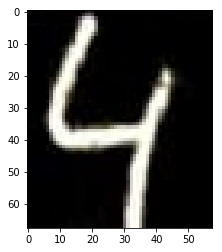

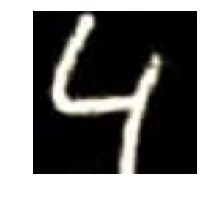

In [29]:
predict('test/4.png')

('G',
 tensor(2),
 tensor([1.6038e-04, 1.2110e-04, 9.8416e-01, 4.9611e-05, 6.2390e-03, 5.8960e-04,
         5.4945e-07, 1.6972e-04, 2.5180e-06, 1.4205e-04, 4.4648e-05, 1.1304e-04,
         4.6014e-06, 4.7825e-03, 1.9271e-05, 2.0138e-05, 2.7763e-04, 3.5280e-05,
         3.0534e-03, 1.0822e-05]))

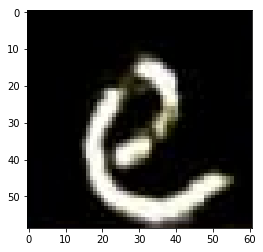

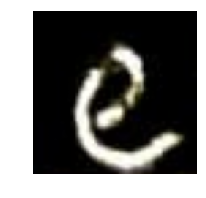

In [30]:
predict('test/e.png')

('G',
 tensor(2),
 tensor([5.7386e-04, 3.2274e-05, 9.2436e-01, 1.4432e-06, 1.4611e-04, 1.2335e-05,
         1.6243e-07, 3.2862e-07, 8.3394e-07, 1.7315e-05, 1.2894e-04, 5.2892e-05,
         5.0593e-06, 4.0881e-02, 6.4651e-04, 4.8166e-05, 3.4696e-06, 4.0963e-07,
         3.3073e-02, 1.6899e-05]))

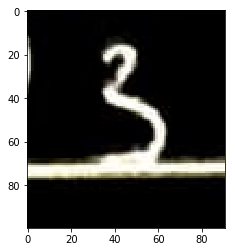

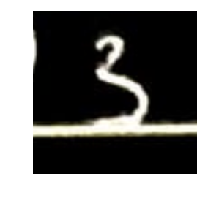

In [31]:
predict('test/3-underline.png')

('G',
 tensor(2),
 tensor([2.3916e-06, 2.5771e-07, 9.9029e-01, 2.3921e-08, 1.3231e-03, 5.7757e-09,
         4.7398e-09, 2.1038e-09, 5.5300e-08, 1.1666e-07, 1.9406e-07, 6.9750e-06,
         2.9784e-10, 7.1867e-06, 1.1167e-06, 2.4991e-07, 1.4764e-07, 2.6174e-09,
         8.3689e-03, 9.6693e-07]))

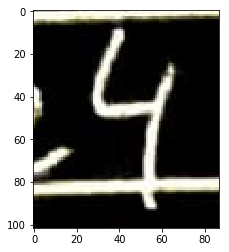

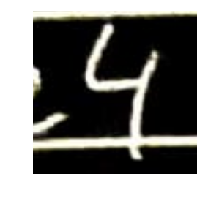

In [32]:
predict('test/4-upper-underline.png')

('G',
 tensor(2),
 tensor([9.2716e-05, 4.4309e-06, 8.8685e-01, 5.1268e-06, 7.5196e-03, 3.8767e-07,
         5.1184e-08, 1.0795e-06, 1.0480e-07, 7.1576e-06, 1.8246e-05, 1.8974e-05,
         2.5585e-08, 5.7066e-03, 1.3619e-05, 1.2645e-05, 1.1916e-05, 2.9311e-08,
         9.9735e-02, 9.7391e-08]))

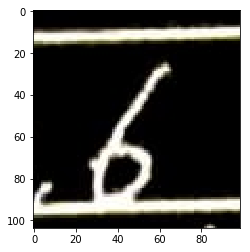

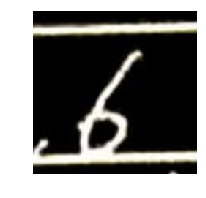

In [33]:
predict('test/6-upper-underline.png')

('G',
 tensor(2),
 tensor([1.1169e-03, 1.7620e-03, 8.9642e-01, 7.9889e-05, 3.8817e-03, 3.2473e-06,
         1.3860e-05, 5.4379e-05, 4.3805e-04, 2.9874e-04, 5.9323e-04, 5.1297e-02,
         1.0153e-05, 5.9749e-03, 9.5796e-05, 1.7774e-05, 3.5435e-05, 2.5295e-05,
         3.7836e-02, 4.6936e-05]))

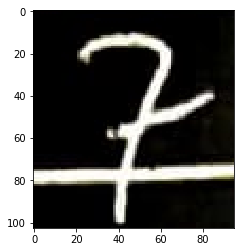

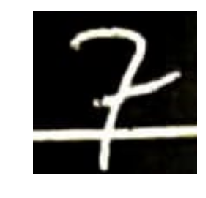

In [34]:
predict('test/7-underline.png')

('G',
 tensor(2),
 tensor([1.2718e-03, 2.8061e-01, 3.6598e-01, 4.4298e-05, 4.9785e-03, 3.4936e-06,
         4.5221e-06, 4.1262e-05, 9.0292e-07, 3.0844e-04, 2.2117e-01, 1.0058e-03,
         7.1536e-05, 7.5070e-02, 4.6804e-06, 4.1306e-05, 8.5001e-05, 7.6569e-04,
         4.7453e-02, 1.0807e-03]))

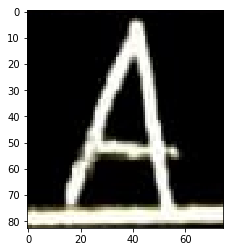

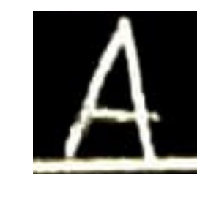

In [35]:
predict('test/a-underline.png')

('G',
 tensor(2),
 tensor([3.5892e-03, 6.7253e-04, 4.8270e-01, 4.5919e-04, 5.3001e-03, 2.9382e-05,
         4.8078e-05, 1.2408e-05, 3.7005e-07, 4.7426e-05, 1.0473e-01, 1.9669e-02,
         1.9343e-05, 5.9546e-03, 9.8124e-06, 1.7158e-04, 5.1591e-03, 1.0501e-04,
         3.7115e-01, 1.6928e-04]))

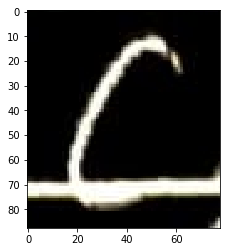

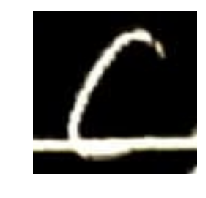

In [36]:
predict('test/c-underline.png')

('G',
 tensor(2),
 tensor([3.7117e-04, 3.4484e-05, 8.7420e-01, 6.4040e-06, 1.5249e-05, 3.7001e-06,
         3.9057e-07, 1.2625e-06, 1.0479e-06, 7.8412e-05, 1.4503e-04, 1.4767e-03,
         8.4401e-07, 4.2415e-04, 2.6267e-06, 1.6750e-06, 4.2384e-06, 1.9943e-06,
         1.2320e-01, 2.4898e-05]))

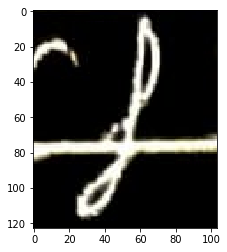

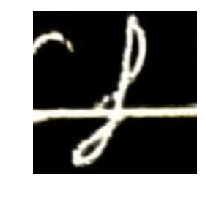

In [37]:
predict('test/f-underline.png')

('G',
 tensor(2),
 tensor([2.6351e-05, 1.0499e-05, 8.6780e-01, 1.0765e-06, 1.5164e-05, 5.8450e-07,
         4.2959e-08, 1.8647e-07, 3.3910e-07, 2.3077e-05, 2.4303e-05, 3.6382e-03,
         3.4339e-08, 8.8457e-04, 1.7707e-06, 2.9082e-06, 2.4798e-07, 3.4212e-07,
         1.2756e-01, 3.3979e-06]))

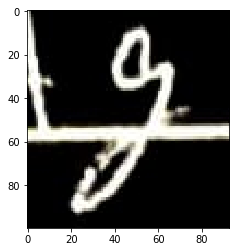

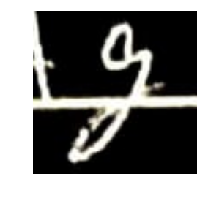

In [38]:
predict('test/g-underline-2.png')

('G',
 tensor(2),
 tensor([1.1842e-05, 5.3524e-05, 8.3692e-01, 3.5415e-06, 1.1764e-03, 1.0651e-05,
         8.4532e-08, 1.4739e-06, 9.1108e-07, 6.7022e-05, 3.7961e-04, 4.0390e-03,
         1.6874e-07, 4.3225e-02, 2.3281e-06, 1.6427e-05, 1.0910e-06, 1.0390e-05,
         1.1401e-01, 7.4628e-05]))

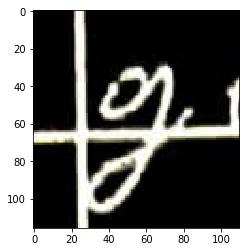

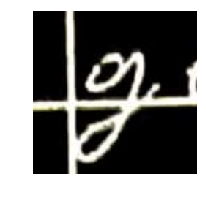

In [39]:
predict('test/g-underline.png')